<a href="https://colab.research.google.com/github/ez314/Fake-Reviews-Project/blob/main/GPT2_Broad_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fine tuning gpt 2 on many categories of Amazon reviews all at once. 

### TODO
- Cache large, soon to be deleted files in VM storage rather than google drive.  

## Python and Env Configuration

In [2]:
#@title Base Configuration Variables { run: "auto" }

#@markdown Workspace root folder
WORKSPACE = '/content/drive/MyDrive/College/Classes/CS 4v98/CS 4v98 Shared Data/Workspace' #@param {type: "string"}

#@markdown Maximum number of reviews to use load from each category
NUM_REVIEWS =  50000#@param {type: "number"}

#@markdown Number of categories to use
NUM_CATEGORIES =  5#@param {type: "number"}

#@markdown Number of prompts to generate for each category
NUM_PROMPTS =  1000#@param {type: "number"}

#@markdown Size of sample for training
TRAINING_SIZE =  80000#@param {type: "number"}

#@markdown Language Model
MODEL = 'gpt2' #@param ['gpt2']

#@markdown Version to be used for save files
CODE_VER =  7#@param {type: "number"}

#@markdown ---

CODE_VER = f'v{CODE_VER}'

#### Not Used

In [ ]:
CATEGORY_CONFIG = {}
#@title Category Configuration { run: "auto" }

#@markdown **AMAZON FASHION**: 883,636 reviews, 186,637 products
CATEGORY_CONFIG['AMAZON_FASHION'] = 2500 #@param {type:"number"}

#@markdown **All Beauty**: 371,345 reviews, 32,992 products
CATEGORY_CONFIG['ALL_BEAUTY'] = 2500 #@param {type:"number"}

#@markdown **Appliances**: 602,777 reviews, 30,459 products
CATEGORY_CONFIG['APPLIANCES'] = 2500 #@param {type:"number"}

#@markdown **Arts Crafts and Sewing**: 2,875,917 reviews, 303,426 products
CATEGORY_CONFIG['ARTS_CRAFTS_AND_SEWING'] = 2500 #@param {type:"number"}

#@markdown **Automotive**: 7,990,166 reviews, 932,019 products
CATEGORY_CONFIG['AUTOMOTIVE'] = 2500 #@param {type:"number"}

#@markdown **Books**: 51,311,621 reviews, 2,935,525 products
CATEGORY_CONFIG['BOOKS'] = 2500 #@param {type:"number"}

#@markdown **CDs and Vinyl**: 4,543,369 reviews, 544,442 products
CATEGORY_CONFIG['CDS_AND_VINYL'] = 2500 #@param {type:"number"}

#@markdown **Cell Phones and Accessories**: 10,063,255 reviews, 590,269 products
CATEGORY_CONFIG['CELL_PHONES_AND_ACCESSORIES'] = 2500 #@param {type:"number"}

#@markdown **Clothing Shoes and Jewelry**: 32,292,099 reviews, 2,685,059 products
CATEGORY_CONFIG['CLOTHING_SHOES_AND_JEWELRY'] = 2500 #@param {type:"number"}

#@markdown **Digital Music**: 1,584,082 reviews, 465,392 products
CATEGORY_CONFIG['DIGITAL_MUSIC'] = 2500 #@param {type:"number"}

#@markdown **Electronics**: 20,994,353 reviews, 786,868 products
CATEGORY_CONFIG['ELECTRONICS'] = 2500 #@param {type:"number"}

#@markdown **Gift Cards**: 147,194 reviews, 1,548 products
CATEGORY_CONFIG['GIFT_CARDS'] = 2500 #@param {type:"number"}

#@markdown **Grocery and Gourmet Food**: 5,074,160 reviews, 287,209 products
CATEGORY_CONFIG['GROCERY_AND_GOURMET_FOOD'] = 2500 #@param {type:"number"}

#@markdown **Home and Kitchen**: 21,928,568 reviews, 1,301,225 products
CATEGORY_CONFIG['HOME_AND_KITCHEN'] = 2500 #@param {type:"number"}

#@markdown **Industrial and Scientific**: 1,758,333 reviews, 167,524 products
CATEGORY_CONFIG['INDUSTRIAL_AND_SCIENTIFIC'] = 2500 #@param {type:"number"}

#@markdown **Kindle Store**: 5,722,988 reviews, 493,859 products
CATEGORY_CONFIG['KINDLE_STORE'] = 2500 #@param {type:"number"}

#@markdown **Luxury Beauty**: 574,628 reviews, 12,308 products
CATEGORY_CONFIG['LUXURY_BEAUTY'] = 2500 #@param {type:"number"}

#@markdown **Magazine Subscriptions**: 89,689 reviews, 3,493 products
CATEGORY_CONFIG['MAGAZINE_SUBSCRIPTIONS'] = 2500 #@param {type:"number"}

#@markdown **Movies and TV**: 8,765,568 reviews, 203,970 products
CATEGORY_CONFIG['MOVIES_AND_TV'] = 2500 #@param {type:"number"}

#@markdown **Musical Instruments**: 1,512,530 reviews, 120,400 products
CATEGORY_CONFIG['MUSICAL_INSTRUMENTS'] = 2500 #@param {type:"number"}

#@markdown **Office Products**: 5,581,313 reviews, 315,644 products
CATEGORY_CONFIG['OFFICE_PRODUCTS'] = 2500 #@param {type:"number"}

#@markdown **Patio Lawn and Garden**: 5,236,058 reviews, 279,697 products
CATEGORY_CONFIG['PATIO_LAWN_AND_GARDEN'] = 2500 #@param {type:"number"}

#@markdown **Pet Supplies**: 6,542,483 reviews, 206,141 products
CATEGORY_CONFIG['PET_SUPPLIES'] = 2500 #@param {type:"number"}

#@markdown **Prime Pantry**: 471,614 reviews, 10,815 products
CATEGORY_CONFIG['PRIME_PANTRY'] = 2500 #@param {type:"number"}

#@markdown **Software**: 459,436 reviews, 26,815 products
CATEGORY_CONFIG['SOFTWARE'] = 2500 #@param {type:"number"}

#@markdown **Sports and Outdoors**: 12,980,837 reviews, 962,876 products
CATEGORY_CONFIG['SPORTS_AND_OUTDOORS'] = 2500 #@param {type:"number"}

#@markdown **Tools and Home Improvement**: 9,015,203 reviews, 571,982 products
CATEGORY_CONFIG['TOOLS_AND_HOME_IMPROVEMENT'] = 2500 #@param {type:"number"}

#@markdown **Toys and Games**: 8,201,231 reviews, 634,414 products
CATEGORY_CONFIG['TOYS_AND_GAMES'] = 2500 #@param {type:"number"}

#@markdown **Video Games**: 2,565,349 reviews, 84,893 products
CATEGORY_CONFIG['VIDEO_GAMES'] = 2500 #@param {type:"number"}


In [ ]:
import ipywidgets as widgets

w_categories = widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    description='Fruits',
    disabled=False
)

w_category_max_depth = widgets.IntText(
    description='Max # of categories to convert into control codes',
    value=5
)

w_categories

SyntaxError: ignored

test


#### Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Pip install

In [5]:
!pip install -q transformers sentencepiece
!pip install -q fastai --upgrade

#### Python imports

In [6]:
import os, gzip, json, gc, re, random
from collections import Counter, defaultdict
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoConfig, AutoModelForPreTraining
from fastai.text.all import *
import pickle

### Set environment and constants

In [7]:
# Set environment variables
%set_env WORKSPACE $WORKSPACE

# Set python constants/configs
SPECIAL_TOKENS  = { "bos_token": "<|BOS|>",
                    "eos_token": "<|EOS|>",
                    "unk_token": "<|UNK|>",
                    "pad_token": "<|PAD|>",
                    "sep_token": "<|SEP|>"}

# Set dir to WORKSPACE
%cd $WORKSPACE

# Initialize numpy RNG
rng = np.random.default_rng()

env: WORKSPACE=/content/drive/MyDrive/College/Classes/CS 4v98/CS 4v98 Shared Data/Workspace
/content/drive/MyDrive/College/Classes/CS 4v98/CS 4v98 Shared Data/Workspace


## Load Data

### [Skip after first time] Fetch data from source, process, and save

#### Download jq

In [ ]:
%%bash
wget -O /usr/bin/jq -q https://github.com/stedolan/jq/releases/download/jq-1.5/jq-linux64
chmod +x /usr/bin/jq


#### Download metadata & reviews, strip unused fields

In [ ]:
%%bash

for CATEGORY_NAME in AMAZON_FASHION All_Beauty Appliances Arts_Crafts_and_Sewing Automotive Books CDs_and_Vinyl Cell_Phones_and_Accessories Clothing_Shoes_and_Jewelry Digital_Music Electronics Gift_Cards Grocery_and_Gourmet_Food Home_and_Kitchen Industrial_and_Scientific Kindle_Store Luxury_Beauty Magazine_Subscriptions Movies_and_TV Musical_Instruments Office_Products Patio_Lawn_and_Garden Pet_Supplies Prime_Pantry Software Sports_and_Outdoors Tools_and_Home_Improvement Toys_and_Games Video_Games
do
  echo "Downloading ${CATEGORY_NAME}..."
  wget -q -P /tmp "http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_${CATEGORY_NAME}.json.gz"
  
  echo "Extracting..."
  gzip -d --force "/tmp/meta_${CATEGORY_NAME}.json.gz"

  echo "Discarding useless fields..."
  jq -rc '{asin, title, category}' "/tmp/meta_${CATEGORY_NAME}.json" > "meta_${CATEGORY_NAME}_slim.json"

  echo "Storage Report:"
  du "/tmp/meta_${CATEGORY_NAME}.json" "meta_${CATEGORY_NAME}_slim.json"

  echo "Removing unprocessed version"
  rm "/tmp/meta_${CATEGORY_NAME}.json"
done

Extracting...
Discarding useless fields...
Storage Report:
17904020	meta_Automotive.json
176407	meta_Automotive_slim.json
Removing unprocessed version


In [ ]:
%%bash

for CATEGORY_NAME in AMAZON_FASHION All_Beauty Appliances Arts_Crafts_and_Sewing Automotive Books CDs_and_Vinyl Cell_Phones_and_Accessories Clothing_Shoes_and_Jewelry Digital_Music Electronics Gift_Cards Grocery_and_Gourmet_Food Home_and_Kitchen Industrial_and_Scientific Kindle_Store Luxury_Beauty Magazine_Subscriptions Movies_and_TV Musical_Instruments Office_Products Patio_Lawn_and_Garden Pet_Supplies Prime_Pantry Software Sports_and_Outdoors Tools_and_Home_Improvement Toys_and_Games Video_Games
do
  echo "Downloading ${CATEGORY_NAME}..."
  wget -q -P /tmp "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/${CATEGORY_NAME}.json.gz"
  
  echo "Extracting..."
  gzip -d --force "/tmp/${CATEGORY_NAME}.json.gz"

  echo "Discarding useless fields..."
  jq -rc '{asin, summary, reviewText, overall}' "/tmp/${CATEGORY_NAME}.json" > "reviews_${CATEGORY_NAME}_slim.json"

  echo "Storage Report:"
  du "/tmp/${CATEGORY_NAME}.json" "reviews_${CATEGORY_NAME}_slim.json"

  echo "Removing unprocessed version"
  rm "/tmp/${CATEGORY_NAME}.json"
done

Extracting...
Discarding useless fields...
Storage Report:
6018796	Sports_and_Outdoors.json
3745286	reviews_Sports_and_Outdoors_slim.json
Removing unprocessed version


### [Skip after first time] Define Data Loading/Processing Functions

#### Function to load metadata into memory

In [ ]:
def load_metadata(top_level_category):
  metadata = {}
  with open(f'meta_{top_level_category}_slim.json') as f:
    for l in f:
      j = json.loads(l.strip())

      # Set default category if it does not exist
      if 'category' not in j or not j['category']:
        category = [top_level_category]
      # Remove any surrounding spaces from the category names
      else:
        category = [x.strip() for x in j['category']]

      # Only load fields you will use! Otherwise, memory usage is extremely high.
      metadata[j['asin']] = {
          'title': j['title'],
          'category': category
      }

  # Convert categories to string
  for m in metadata.values():
    fixed_size_categories = (
        m['category'][:NUM_CATEGORIES] + 
        [SPECIAL_TOKENS['unk_token']] * max(0, NUM_CATEGORIES - len(m['category']))
    )
    m['category'] = SPECIAL_TOKENS['sep_token'].join(fixed_size_categories)

  # total length of list, this number equals total number of products
  print(f'Loaded {len(metadata)} items')

  return metadata

#### Function to load reviews into memory

In [ ]:
# Build training data and store to reviews (defaultdict of rating -> list(review))
def load_reviews(top_level_category):
  metadata = load_metadata(top_level_category)
  reviews = defaultdict(list)
  with open(f'reviews_{top_level_category}_slim.json') as f:
    i = 0
    for l in f:
      j = json.loads(l.strip())

      # Filter unusable reviews
      if 'reviewText' not in j or not j['reviewText'] or j['asin'] not in metadata:
        continue

      # Increment counter, break if loaded enough reviews
      # "Enough" defined as NUM_REVIEWS*20, tolerates each category making up >= 5% of reviews
      i += 1
      if i > NUM_REVIEWS * 10:
        break
      
      prod_meta = metadata[j['asin']]
      rating = str(int(j["overall"]))

      # Why not build the string right now? Uses too much memory :(
      # Track relevant info for each review
      reviews[rating].append((j['asin'], rating, j['reviewText']))

  return metadata, reviews

#### Function to get sample of reviews

In [ ]:
# Calculate how many reviews we want to look at
# NUM_REVIEWS_PER_RATING = NUM_REVIEWS // len(reviews.keys())

def get_reviewText(top_level_category, metadata, reviews):
  num_reviews_per_rating = NUM_REVIEWS // len(reviews)
  
  # Keep track of which product ASINs we haven't looked at. These are guaranteed to not appear in training data
  unseen_asins = set(metadata.keys())

  # Build dataframe of actual training set
  sample_reviews = []
  ratings = list(reviews.keys())
  for rating in ratings:
    sample_size = num_reviews_per_rating
    if len(reviews[rating]) < num_reviews_per_rating:
      print(f'WARNING: Requested {num_reviews_per_rating} reviews but {top_level_category}/{rating} only had {len(reviews[rating])} reviews')
      sample_size = len(reviews[rating])

    print(f'Sampling {sample_size}/{len(reviews[rating])} reviews with rating of {rating}.')

    # Pick NUM_REVIEWS_PER_RATING ratings at random to include
    for asin, rating, reviewText in random.sample(reviews[rating], sample_size):
      prod_meta = metadata[asin]
      sample_reviews.append((        
          SPECIAL_TOKENS['bos_token'] + prod_meta['title'] + \
          SPECIAL_TOKENS['sep_token'] + prod_meta['category'] + \
          SPECIAL_TOKENS['sep_token'] + rating + \
          SPECIAL_TOKENS['sep_token'] + reviewText + \
          SPECIAL_TOKENS['eos_token']
      ))
      # Track products which are not in the training data
      if asin in unseen_asins:
        unseen_asins.remove(asin)

  sample_reviews = pd.DataFrame(sample_reviews, columns=["reviewText"])
  sample_reviews.to_csv(f'{top_level_category}_processed_{CODE_VER}.csv', index=False)

  return sample_reviews, unseen_asins

#### Function to build prompts from unseen ASINs set

In [ ]:
def asins_to_prompts(top_level_category, asins, metadata):
  # First, convert asins set to a sorted list for reproducability and sampling
  asins_list = sorted(list(asins))
  prompts = []

  sample_size = NUM_PROMPTS
  if len(asins_list) < NUM_PROMPTS:
    print(f'WARNING: Requested {NUM_PROMPTS} prompts but {top_level_category} only had {len(asins_list)} unused products')
    sample_size = len(asins_list)

  print(f'Sampling {sample_size}/{len(asins)} prompts.')
  for asin in random.sample(asins_list, sample_size):
    prod_meta = metadata[asin]
    prompts.append(
        SPECIAL_TOKENS['bos_token'] + prod_meta['title'] + 
        SPECIAL_TOKENS['sep_token'] + prod_meta['category'] + 
        SPECIAL_TOKENS['sep_token']
    )

  prompts = pd.DataFrame(prompts, columns=["prompt"])
  prompts.to_csv(f"{top_level_category}_processed_{CODE_VER}_prompts.csv", index=False)

  return prompts

#### Function to process/return everything for a single category

In [ ]:
def process_category(top_level_category):
  print(f'Processing {top_level_category}')
  metadata, reviews = load_reviews(top_level_category)
  sample_reviews, unseen_asins = get_reviewText(top_level_category, metadata, reviews)
  prompts = asins_to_prompts(top_level_category, unseen_asins, metadata)
  
  return sample_reviews, prompts

### [Skip after first time] Load data for all categories

In [ ]:
categories = ('All_Beauty', 'Appliances', 'Arts_Crafts_and_Sewing', 'Automotive', 'Books', 'CDs_and_Vinyl', 'Cell_Phones_and_Accessories', 'Clothing_Shoes_and_Jewelry', 'Digital_Music', 'Electronics', 'Gift_Cards', 'Grocery_and_Gourmet_Food', 'Home_and_Kitchen', 'Industrial_and_Scientific', 'Kindle_Store', 'Luxury_Beauty', 'Magazine_Subscriptions', 'Movies_and_TV', 'Musical_Instruments', 'Office_Products', 'Patio_Lawn_and_Garden', 'Pet_Supplies', 'Prime_Pantry', 'Software', 'Sports_and_Outdoors', 'Tools_and_Home_Improvement', 'Toys_and_Games', 'Video_Games')

all_reviews = []
prompts = {}
for category in categories:
  cat_reviews, cat_prompts = process_category(category)
  all_reviews.append(cat_reviews)
  prompts[category] = cat_prompts

all_reviews = pd.concat(all_reviews).sample(frac=1).reset_index(drop=True)

Processing All_Beauty
Loaded 32488 items
Sampling 10000/224893 reviews with rating of 5.
Sampling 10000/52090 reviews with rating of 4.
Sampling 10000/29448 reviews with rating of 3.
Sampling 10000/39156 reviews with rating of 1.
Sampling 10000/20241 reviews with rating of 2.
Sampling 1000/20573 prompts.
Processing Appliances
Loaded 30239 items
Sampling 10000/347462 reviews with rating of 5.
Sampling 10000/63805 reviews with rating of 4.
Sampling 10000/25247 reviews with rating of 3.
Sampling 10000/46698 reviews with rating of 1.
Sampling 10000/16788 reviews with rating of 2.
Sampling 1000/24194 prompts.
Processing Arts_Crafts_and_Sewing
Loaded 302380 items
Sampling 10000/343885 reviews with rating of 5.
Sampling 10000/67585 reviews with rating of 4.
Sampling 10000/20123 reviews with rating of 2.
Sampling 10000/34302 reviews with rating of 3.
Sampling 10000/34105 reviews with rating of 1.
Sampling 1000/298343 prompts.
Processing Automotive
Loaded 924693 items
Sampling 10000/344582 revi

#### Garbage Collect

In [ ]:
# Save memory, clear useless large objects no longer used after this section
gc.collect()

452

#### Pickle and store current values

In [ ]:
pickle.dump((all_reviews, prompts), open(f'all_reviews_and_prompts_{CODE_VER}', 'wb'))

### [Only run after first time] Load processed data from disk

In [8]:
all_reviews, prompts = pickle.load(open(f'all_reviews_and_prompts_{CODE_VER}', 'rb'))

### Break data into train and valid

In [9]:
# Extract a relatively small sample out of the larger samples, to train on
sample_df = all_reviews.sample(n=TRAINING_SIZE, random_state=2021).dropna().reset_index()

In [10]:
del all_reviews
gc.collect()

30

In [11]:
df_train, df_valid = train_test_split(sample_df, random_state=2021, test_size=0.1)
all_texts = np.concatenate([df_train["reviewText"].values, df_valid["reviewText"].values])

## Download Pre-Trained Model (gpt2)
And configure tokenizer to recognize special tokens


In [12]:
def get_tokenizer(special_tokens=None):
    tokenizer = AutoTokenizer.from_pretrained(MODEL) #GPT2Tokenizer

    if special_tokens:
        tokenizer.add_special_tokens(special_tokens)
        print("Special tokens added")
    return tokenizer

def get_model(tokenizer, special_tokens=None, load_model_path=None):

    #GPT2LMHeadModel
    if special_tokens:
        config = AutoConfig.from_pretrained(MODEL, 
                                            bos_token_id=tokenizer.bos_token_id,
                                            eos_token_id=tokenizer.eos_token_id,
                                            sep_token_id=tokenizer.sep_token_id,
                                            pad_token_id=tokenizer.pad_token_id,
                                            output_hidden_states=False)
    else: 
        config = AutoConfig.from_pretrained(MODEL,                                     
                                            pad_token_id=tokenizer.eos_token_id,
                                            output_hidden_states=False)    

    model = AutoModelForPreTraining.from_pretrained(MODEL, config=config)

    if special_tokens:
        #Special tokens added, model needs to be resized accordingly
        model.resize_token_embeddings(len(tokenizer))

    if load_model_path:
        model.load_state_dict(torch.load(load_model_path))

    model.cuda()
    return model

In [13]:
tokenizer = get_tokenizer(SPECIAL_TOKENS)
model = get_model(tokenizer, special_tokens=SPECIAL_TOKENS)

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Special tokens added


Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

In [14]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)[:1024]
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [15]:
splits = [list(df_train.index), list(df_valid.index)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [16]:
tls.train[0]

tensor([50257,    27, 12626,  1398,  2625,    64,    12,  7857,    12, 24132,
          257,    12,  8043,    12, 38238,     1, 50261, 36028,  3834, 12048,
          507, 50261, 17469, 10738,  1222,   696,    26,  8099, 17346, 50261,
         6767,  5024, 50261, 50259, 50261, 50259, 50261,    18, 50261,    54,
          680,   340,   550,  1110,   640, 13487,   635,    11,  2592,   329,
          262, 21511,    13,   220,  8192,   284,   751,  5193,   517,  2456,
           11,   523,   994,   484,   389,    13, 50258])

In [17]:
tls.valid[0]

tensor([50257, 15905,  3964,   838,  5995,   930, 10472, 50261, 25423, 50261,
        27640, 10442, 50261, 18843,   803, 11998, 50261, 50259, 50261, 50259,
        50261,    19, 50261, 20459,  9168,   838,   611,   345,   765,   262,
          749,  2274,   530,   788,   994,   340,   318,    13,   314,  1612,
         9168,   838,   318,   922,   475,   407,   355,   922,   355,  9168,
          767,    11,   314,   561,   423,  1392,  9168,   767,    11,   475,
          314,   655,  3170,   616,   649, 40653,   523,   314,  3066,   284,
          651,  9168,   838,   780,  9168,   767,   481,   307,  1972, 23572,
        14556,   621,  9168,   838,    13, 50258])

In [18]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([67]), torch.Size([86]))

In [19]:
show_at(tls.train, 0)

<|BOS|><span class="a-size-medium a-color-secondary"<|SEP|>Magazine Subscriptions<|SEP|>Entertainment &amp; Pop Culture<|SEP|>Television<|SEP|><|UNK|><|SEP|><|UNK|><|SEP|>3<|SEP|>Wish it had day time listing also, especially for the weekends.  Have to add nine more words, so here they are.<|EOS|>


In [20]:
show_at(tls.valid, 0)

<|BOS|>Microsoft Windows 10 Home | Download<|SEP|>Software<|SEP|>Digital Software<|SEP|>Operating Systems<|SEP|><|UNK|><|SEP|><|UNK|><|SEP|>4<|SEP|>Its windows 10 if you want the most recent one then here it is. I mean windows 10 is good but not as good as windows 7, I would have got windows 7, but I just built my new pc so I decided to get windows 10 because windows 7 will be getting outdated sooner than windows 10.<|EOS|>


In [21]:
bs,sl = 4,256
dls = tls.dataloaders(bs=bs, seq_len=sl)

Token indices sequence length is longer than the specified maximum sequence length for this model (1160 > 1024). Running this sequence through the model will result in indexing errors


In [22]:
dls.show_batch(max_n=2)

,text,text_
0,"<|BOS|> The Twitter Effect<|SEP|>Kindle Store<|SEP|>Kindle eBooks<|SEP|>Computers & Technology<|SEP|><|UNK|><|SEP|><|UNK|><|SEP|>4<|SEP|>Well, it was quite nice from the beginning but towards the end, it sounded like a book filled of classified ads (lol). Still nice though.<|EOS|><|BOS|>Mr. Majestyk VHS<|SEP|>Movies & TV<|SEP|>Studio Specials<|SEP|>20th Century Fox Home Entertainment<|SEP|>Action<|SEP|>General<|SEP|>4<|SEP|>Serious action film, but reminiscent of Malagro Bean Field wars. I loved it--my wife, not so much.<|EOS|><|BOS|>Larabar Renola Berry Grain-Free Granola Pouches, 5.1 Ounce<|SEP|>Prime_Pantry<|SEP|><|UNK|><|SEP|><|UNK|><|SEP|><|UNK|><|SEP|><|UNK|><|SEP|>5<|SEP|>These taste really good, and are very filling for a snack. I highly recommend.<|EOS|><|BOS|>Moleskine Classic Hard Cover Notebook, Ruled, Pocket Size (3.5"" x 5.5"") Scarlet Red - Hard Cover Notebook for Writing, Sketching, Journals<|SEP|>Office Products<|SEP|>Office &amp; School Supplies<|SEP|>Paper<|SEP|>Notebooks &amp; Writing Pads<|SEP|>Composition Notebooks<|SEP|>4<|SEP|>I love the quality feel of the notebook itself, but the paper seems","The Twitter Effect<|SEP|>Kindle Store<|SEP|>Kindle eBooks<|SEP|>Computers & Technology<|SEP|><|UNK|><|SEP|><|UNK|><|SEP|>4<|SEP|>Well, it was quite nice from the beginning but towards the end, it sounded like a book filled of classified ads (lol). Still nice though.<|EOS|><|BOS|>Mr. Majestyk VHS<|SEP|>Movies & TV<|SEP|>Studio Specials<|SEP|>20th Century Fox Home Entertainment<|SEP|>Action<|SEP|>General<|SEP|>4<|SEP|>Serious action film, but reminiscent of Malagro Bean Field wars. I loved it--my wife, not so much.<|EOS|><|BOS|>Larabar Renola Berry Grain-Free Granola Pouches, 5.1 Ounce<|SEP|>Prime_Pantry<|SEP|><|UNK|><|SEP|><|UNK|><|SEP|><|UNK|><|SEP|><|UNK|><|SEP|>5<|SEP|>These taste really good, and are very filling for a snack. I highly recommend.<|EOS|><|BOS|>Moleskine Classic Hard Cover Notebook, Ruled, Pocket Size (3.5"" x 5.5"") Scarlet Red - Hard Cover Notebook for Writing, Sketching, Journals<|SEP|>Office Products<|SEP|>Office &amp; School Supplies<|SEP|>Paper<|SEP|>Notebooks &amp; Writing Pads<|SEP|>Composition Notebooks<|SEP|>4<|SEP|>I love the quality feel of the notebook itself, but the paper seems to"
1,"rebels to follow him as they go into exile. And there's the poignant revelation when Peter and Susan learn that they can never come back. But the rest of the novel is pretty much a loss.<|EOS|><|BOS|>Tripp Lite 7 Outlet Surge Protector Power Strip, 6ft Cord, $20K INSURANCE (STRIKER)<|SEP|>Electronics<|SEP|>Accessories & Supplies<|SEP|>Power Strips & Surge Protectors<|SEP|>Power Strips<|SEP|><|UNK|><|SEP|>5<|SEP|>The plug strip is built well. The extra cable length is a real bonus. I just hate when the cord is just a few inches short. Well built, good utility to run gear off of. Not just for home use.<|EOS|><|BOS|>Highland Shift (Highland Destiny Book 1) - Kindle edition<|SEP|>Kindle Store<|SEP|>Kindle eBooks<|SEP|>Romance<|SEP|><|UNK|><|SEP|><|UNK|><|SEP|>3<|SEP|>This book had a great premise! My only complaint is that there seemed to be more sex than anything else and it took away from the story line<|EOS|><|BOS|>Flowtron BK-80D 80-Watt Electronic Insect Killer, 1-1/2 Acre Coverage<|SEP|>Patio, Lawn & Garden<|SEP|>Pest","to follow him as they go into exile. And there's the poignant revelation when Peter and Susan learn that they can never come back. But the rest of the novel is pretty much a loss.<|EOS|><|BOS|>Tripp Lite 7 Outlet Surge Protector Power Strip, 6ft Cord, $20K INSURANCE (STRIKER)<|SEP|>Electronics<|SEP|>Accessories & Supplies<|SEP|>Power Strips & Surge Protectors<|SEP|>Power Strips<|SEP|><|UNK|><|SEP|>5<|SEP|>The plug strip is built well. The extra cable length is a real bonus. I just hate when the cord is just a few inches short. Well built, good utility to run gear off of. Not just for home use.<|EOS|><|BOS|>Highland Shift (Highland Destiny Book 1) - Kindle edition<|SEP

## Fine-tuning

### Create Learner from model

In [24]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [25]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

### [Skip after first time] Run fine-tuning and save

In [ ]:
learn.validate()

(#2) [93.75222778320312,inf]

SuggestedLRs(valley=0.0003981071640737355)

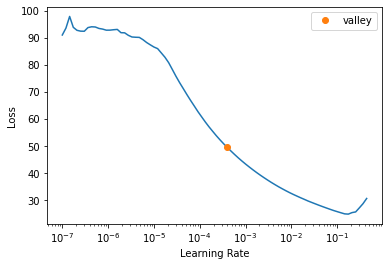

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,2.983576,2.895633,18.094952,1:57:05


In [ ]:
learn.save(f"gpt2-control-generation-BROAD-{CODE_VER}")

Path('models/gpt2-control-generation-BROAD-v7.pth')

### [Only run after first time] Load fine-tuned model from disk

In [26]:
learn.load(f"gpt2-control-generation-BROAD-{CODE_VER}")

## Run Model

### Manual Checking

In [ ]:
prompts.keys()

dict_keys(['All_Beauty', 'Appliances', 'Arts_Crafts_and_Sewing', 'Automotive', 'Books', 'CDs_and_Vinyl', 'Cell_Phones_and_Accessories', 'Clothing_Shoes_and_Jewelry', 'Digital_Music', 'Electronics', 'Gift_Cards', 'Grocery_and_Gourmet_Food', 'Home_and_Kitchen', 'Industrial_and_Scientific', 'Kindle_Store', 'Luxury_Beauty', 'Magazine_Subscriptions', 'Movies_and_TV', 'Musical_Instruments', 'Office_Products', 'Patio_Lawn_and_Garden', 'Pet_Supplies', 'Prime_Pantry', 'Software', 'Sports_and_Outdoors', 'Tools_and_Home_Improvement', 'Toys_and_Games', 'Video_Games'])

In [ ]:
prompts['Automotive'].head(10) # Display some products that we haven't trained on

,prompt
0,"<|BOS|>Espresso Wenge Reversible L-Desk 72&quot;W with Brushed Nickel Modesty Panel Legs - At Work Collection<|SEP|>Office Furniture & Lighting,Desks & Workstations,Desks,Office Desks<|SEP|>5<|SEP|>"
1,"<|BOS|>STEELMASTER Contemporary Vertical Organizer with 4 Slots, 8.38 x 12 x 7.25 Inches, Granite (2644500A3)<|SEP|>Office Furniture & Lighting,Cabinets, Racks & Shelves,Racks & Displays<|SEP|>5<|SEP|>"
2,"<|BOS|>100 5x7 Reclosable Poly Clear Plastic Zip Lock Zipper Bag 4 Mil Jewelry Baggies<|SEP|>Office & School Supplies,Envelopes, Mailers & Shipping Supplies,Mail Bags & Transit Sacks,Mail Bags<|SEP|>5<|SEP|>"
3,<|BOS|>GLOBE-WEIS Colored Classification Folder (PU5615LBL)<|SEP|>Office & School Supplies<|SEP|>5<|SEP|>
4,"<|BOS|>3&quot; X 4&quot; - 2 Mil Clear White Block Reclosable Poly Zip Lock Bags Pack of 100<|SEP|>Office & School Supplies,Envelopes, Mailers & Shipping Supplies,Mail Bags & Transit Sacks,Mail Bags<|SEP|>5<|SEP|>"
5,"<|BOS|>Assorted Hand made Voodoo String Doll Key Chain (12 pieces)<|SEP|>Office & School Supplies,Forms, Recordkeeping & Money Handling,Key Tags & Chains<|SEP|>5<|SEP|>"
6,"<|BOS|>Vonage Phone Solution Adapter + Cordless Phone System, New for 2011 Vonage Digital Phone System Adapter and Dect 6.0 Motorola Cordless System L603 (not the previous L403) in One Box<|SEP|>Office Electronics,Telephones & Accessories,Landline Phones,Cordless Telephones<|SEP|>5<|SEP|>"
7,"<|BOS|>NEW 100 Feet Flexible Magnet Magnetic Strip 1&quot; wide Adhesive Back 30 Mil<|SEP|>Office & School Supplies,Tape, Adhesives & Fasteners,Interlocking Tape & Mounting Products,Magnetic Tape<|SEP|>5<|SEP|>"
8,"<|BOS|>Palmetto 2-Drawer Oak File Cabinet Warm Honey<|SEP|>Office & School Supplies,Forms, Recordkeeping & Money Handling,Key Cabinets, Racks & Holders,Cabinets<|SEP|>5<|SEP|>"
9,"<|BOS|>Pelikan Pelikano Blue Fountain Pen Medium<|SEP|>Office & School Supplies,Writing & Correction Supplies,Pens & Refills,Fountain Pens<|SEP|>5<|SEP|>"


In [ ]:
prompt = "<|BOS|>Espresso Wenge Reversible L-Desk 72&quot;W with Brushed Nickel Modesty Panel Legs - At Work Collection<|SEP|>Office Furniture & Lighting,Desks & Workstations,Desks,Office Desks<|SEP|>1<|SEP|>"
prompt_len = len(re.sub(r'<\|[A-Z]{3}\|>', '', prompt))

prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()

preds = learn.model.generate(inp, max_length=1024, do_sample=True, top_k=0, top_p=0.92, num_return_sequences=25, temperature=0.7)
for i, pred in enumerate(preds):
  print("{}: {}".format(i+1, tokenizer.decode(pred, skip_special_tokens=True)[prompt_len:]))

1: The legs are a bit too wide for my liking.  I got the drawer on the first floor and they are definitely not a good fit.  I am going to go back to the office supply store.  I will definitely buy again.
2: It is a HUGE piece of furniture.  It is a huge piece of junk.  It was just not worth the $30 it was charged for.  It is not worth the money.
3: The leg is too short, the hinge too tight, the hinge too loose, and the legs don't stay together.  My desk looks like it was scratched.  I'll never buy another one.
4: I had to use a hard to find regular staple tray to put in my desk, but it worked fine.  I didn't expect it to work.  I had to purchase a new one because I don't want to pay the extra $60 for a regular staple tray.  I also had to use a new staple tray because it was too heavy for my desk.  It was a total waste of money.
5: I have had this for over a year now and it has completely destroyed my desk.  The carpet is carpet, not even a single rug.  I am very happy with it.  It is n

### Generate CG/OG survey data

In [27]:
# TODO: move these to top config
NUM_OR = 15
NUM_CG = 15

NUM_RET_SEQS = 1

mixed_reviews = [] # [product name, categories, star rating, CG/OG, review text]

# The end of the regex is so complicated because reviews that actually reach 1024 tokens long will not end with EOS
regex = re.compile(
    r'<\|BOS\|>(.*?)<\|SEP\|>' + 
    r'(.*)<\|SEP\|>' * (NUM_CATEGORIES-1) +
    r'(.*)<\|SEP\|>(\d)<\|SEP\|>(?:(.*)(?:<\|EOS\|>)|(.*))', 
    re.MULTILINE | re.DOTALL
)

def add_review(review, label):
  if not regex.match(review):
    print(regex)
    print(review)

  groups = regex.match(review).groups()
  title, rating, reviewText = groups[0], groups[-3], groups[-1] if groups[-1] else groups[-2]
  categories = groups[1:-3]
  mixed_reviews.append([title, *categories, rating, label, reviewText])

# Add the OG data (which we trained on)
for review in np.random.choice(all_texts, NUM_OR*len(prompts), replace=False):
  # Parse review and add it to the mixed reviews
  add_review(review, 'OR')

# Add the CG data
for cat_prompts in prompts.values():
  for prompt in np.random.choice(cat_prompts['prompt'].values, NUM_CG, replace=False):
    # Add rating section to the prompt
    rating = str(random.randint(1, 5)) # pick star rating with equal probability
    prompt += rating + SPECIAL_TOKENS['sep_token']
    
    # Generate NUM_RET_SEQS possible reviews
    prompt_ids = tokenizer.encode(prompt)
    inp = tensor(prompt_ids)[None].cuda()
    preds = learn.model.generate(inp, max_length=1024, do_sample=True, top_k=0, top_p=0.92, num_return_sequences=NUM_RET_SEQS, temperature=0.7)

    # Pick one and add it to the mixed dataset
    idx = random.randrange(NUM_RET_SEQS)
    review = tokenizer.decode(preds[idx])

    # Parse review and add it to the mixed reviews
    add_review(review, 'CG')

category_headers = [f'category_{i+1}' for i in range(NUM_CATEGORIES)]
mixed_reviews = pd.DataFrame(mixed_reviews, columns=["product", *category_headers, "rating", "label", "review"])
mixed_reviews.to_csv(f'BROAD_mixed_reviews_{CODE_VER}.csv', index=None)


In [28]:
mixed_reviews.head(20)

,product,category_1,category_2,category_3,category_4,category_5,rating,label,review
0,"Salsbury Industries 4615BGE Traditional Mailbox Decorative Horizontal Style, Beige",Tools & Home Improvement,Hardware,Mailboxes & Accessories,Post-Mount Mailboxes,<|UNK|>,5,OR,Excellent
1,GE MWF SmartWater Compatible Water Filter Cartridge - Refrigerator,Appliances,Parts & Accessories,Refrigerator Parts & Accessories,Water Filters,<|UNK|>,2,OR,It has not preformed nearly as good as the OE filter.
2,"La Roche-Posay Redermic R Anti-Aging Retinol Serum, 1.01 Fl. Oz.",Luxury_Beauty,<|UNK|>,<|UNK|>,<|UNK|>,<|UNK|>,1,OR,This unfortunately caused major acne breakouts for me
3,"Chicago Metallic Professional 12-Cup Non-Stick Mini-Popover Pan, 16-Inch-by-10.75-Inch",Home & Kitchen,Kitchen & Dining,Bakeware,<|UNK|>,<|UNK|>,4,OR,great buy
4,RoadPro RP-1179 12V Heavy Duty Metal 2-Speed Fan,Automotive,RV Parts & Accessories,"Appliances, Heating, A/C & Ventilation",Ventilation,<|UNK|>,3,OR,"It moves air, it seems to work. It is a bit noisy. Not noisy in a white noise fan sorta way, but more like a weird harmonic vibration noise like the sound of fighter ships in star wars. I would have returned it, but decided it was in fact worth the low price paid, and I will find a place for it onboard. It would probably be fine on the dash or a pillar in a noisy truck, but too noisy to run at night in a quiet cabin."
5,"<span class=""a-size-medium a-color-secondary""",Magazine Subscriptions,"Cooking, Food & Wine",Recipes & Techniques,<|UNK|>,<|UNK|>,4,OR,WHEN AND WHERE I GET THIS MAGAZINE MY WIFE WILL TELL ME HOW TAUGHTFUL I WAS SO DON'T FAIL SENDING THIS.IT WAS EASY TO ORDER.
6,"Bisquick Heart Smart Baking Mix, 40 Ounce",Prime_Pantry,<|UNK|>,<|UNK|>,<|UNK|>,<|UNK|>,4,OR,Great stuff.
7,Yomega Brain - The YoYo with a Brain Includes Auto Return Technology - Beginner Level String Trick Yo Yo (Colors May Vary),Toys & Games,Sports & Outdoor Play,Yo-yos,<|UNK|>,<|UNK|>,5,OR,Great for playing around
8,"Rain-X 800002243 Yellow Windshield Treatment, 7. Fluid_Ounces",Automotive,Car Care,<|UNK|>,<|UNK|>,<|UNK|>,1,OR,Failed to work on my boat
9,BFP Early-Detection Pregnancy Tests: Pack of 5 Tests,Industrial & Scientific,Professional Medical Supplies,Diagnostics & Screening,Laboratory Diagnostics,Clinical Diagnostic Test Kits,4,OR,This is the most cost effective way to buy pregnancy tests if you are going to be doing them often. A person who struggles with infertility may find this option very helpful. This company also makes the ovulation predictor strips. I did not need to use them before a missed period so I'm not sure if they really work before the end of a cycle. They would also be good for women who need to verify their pregnancy results many times.


# Misc

## Find out what GPU is being used

GPU | Time to fine tune
-|-
T4 | 20  
K80 | 85

In [1]:
!nvidia-smi

Sun Mar 27 06:42:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------